In [1]:
ENV["PYTHON"] ="/home/admin2/miniconda3/bin/python"

"/home/admin2/miniconda3/bin/python"

In [2]:
using MLDatasets
using PyPlot
using PyCall

In [3]:
tf = pyimport("tensorflow")
tfds = pyimport("tensorflow_datasets")
np = pyimport("numpy")
plt = pyimport("matplotlib.pyplot")

2021-01-20 21:25:20.533655: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


PyObject <module 'matplotlib.pyplot' from '/home/admin2/miniconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [4]:
pushfirst!(PyVector(pyimport("sys")."path"), "")

PyObject ['', '/home/admin2/miniconda3/lib/python37.zip', '/home/admin2/miniconda3/lib/python3.7', '/home/admin2/miniconda3/lib/python3.7/lib-dynload', '/home/admin2/miniconda3/lib/python3.7/site-packages', '/home/admin2/miniconda3/lib/python3.7/site-packages/IPython/extensions']

In [5]:
PyVector(pyimport("sys")."path")

6-element PyVector{PyAny}:
 ""
 "/home/admin2/miniconda3/lib/python37.zip"
 "/home/admin2/miniconda3/lib/python3.7"
 "/home/admin2/miniconda3/lib/python3.7/lib-dynload"
 "/home/admin2/miniconda3/lib/python3.7/site-packages"
 "/home/admin2/miniconda3/lib/python3.7/site-packages/IPython/extensions"

###  Preprocessing

In [6]:
data_util = pyimport("data_util2")
#function_name = pyimport("data_util2")["function_name"]

PyObject <module 'data_util2' from '/home/admin2/workspace/ku/comp541_project/data_util2.py'>

In [7]:
# load full training set
train_x, train_y = CIFAR10.traindata();

# load full test set
test_x,  test_y  = CIFAR10.testdata();

In [8]:
# [height,weight,channel] --> [weight,height]
train_x2 = permutedims(train_x, (2, 1, 3, 4));

In [9]:
image2 = train_x2[:,:,:,17];

Original image

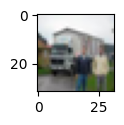

PyObject <matplotlib.image.AxesImage object at 0x7ff9af4d42d0>

In [10]:
plt.figure(figsize=(1,1))
plt.imshow(image2)

Transformed images 

In [11]:
image2_edit_a = data_util[:preprocess_image](image2, 32, 32,is_training=true).numpy();

Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.


2021-01-20 21:25:30.507102: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-01-20 21:25:30.625350: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:04:00.0 name: Tesla P100-SXM2-16GB computeCapability: 6.0
coreClock: 1.4805GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-01-20 21:25:30.627529: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 1 with properties: 
pciBusID: 0000:06:00.0 name: Tesla P100-SXM2-16GB computeCapability: 6.0
coreClock: 1.4805GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-01-20 21:25:30.629553: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 2 with properties: 
pciBusID: 0000:07:00.0 name: Tesla P100-SXM2-16GB computeCapability: 6.0
coreClock: 1.4805GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88G

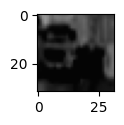

PyObject <matplotlib.image.AxesImage object at 0x7ff9af4d46d0>

In [12]:
plt.figure(figsize=(1,1))
plt.imshow(image2_edit_a)

In [13]:
image2_edit_b = data_util[:preprocess_image](image2, 32, 32,is_training=true).numpy();

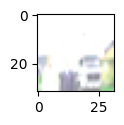

PyObject <matplotlib.image.AxesImage object at 0x7ff9af4d4850>

In [14]:
plt.figure(figsize=(1,1))
plt.imshow(image2_edit_b)

Alternative way

In [11]:
py"""
from data_util2 import preprocess_image
image2_edit = preprocess_image($image2, 32, 32,is_training=True)
"""

Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.


2021-01-20 14:08:47.254974: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-01-20 14:08:47.404339: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:04:00.0 name: Tesla P100-SXM2-16GB computeCapability: 6.0
coreClock: 1.4805GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-01-20 14:08:47.406519: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 1 with properties: 
pciBusID: 0000:06:00.0 name: Tesla P100-SXM2-16GB computeCapability: 6.0
coreClock: 1.4805GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-01-20 14:08:47.408663: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 2 with properties: 
pciBusID: 0000:07:00.0 name: Tesla P100-SXM2-16GB computeCapability: 6.0
coreClock: 1.4805GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88G

### Create a batch

In [15]:
size(train_x2)

(32, 32, 3, 50000)

In [16]:
size(train_x2[:,:,:,1:256])

(32, 32, 3, 256)

In [17]:
n = size(train_x2)[end]
bsize = min(32, n )
cur, next = train_x2[:,:,:,1:bsize] , train_x2[:,:,:,bsize+1:end];

In [18]:
size(next)

(32, 32, 3, 49968)

In [19]:
size(cur)

(32, 32, 3, 32)

In [105]:
data_util[:preprocess_image](cur[:,:,:,32], 32, 32,is_training=true).numpy()

32×32×3 Array{Float32,3}:
[:, :, 1] =
 0.553128   0.553128    0.553128  …  0.0         0.0        0.0
 0.553128   0.553128    0.553128     0.0551091   0.0898471  0.0948064
 0.553128   0.553128    0.553128     0.212633    0.28628    0.304865
 0.553128   0.553128    0.553128     0.11664     0.185293   0.202382
 0.553128   0.553128    0.553128     0.0438398   0.0712077  0.0774384
 0.553128   0.553128    0.553128  …  0.0427512   0.0281829  0.0236565
 0.553128   0.553128    0.553128     0.160369    0.164865   0.166758
 0.553128   0.553128    0.553128     0.205076    0.23695    0.246384
 0.553128   0.553128    0.553128     0.0728092   0.101963   0.108631
 0.553128   0.553128    0.553128     0.00264493  0.0171419  0.0196152
 0.553128   0.553128    0.553128  …  0.0287805   0.0341918  0.0346959
 0.361729   0.402171    0.452336     0.106878    0.106576   0.107376
 0.103336   0.15932     0.208381     0.186649    0.18383    0.185887
 ⋮                                ⋱              ⋮          
 0.2

In [20]:
new1 = cat( zeros(size(cur)), zeros(size(cur)); dims=4)
for i in (1:bsize)
    #print(i,"\n")
    image = cur[:,:,:,i]
    for k in (1:2)
        new1[:,:,:,2i+k-2] = data_util[:preprocess_image](image, 32, 32, is_training=true).numpy();
        #new1[:,:,:,2i] = data_util[:preprocess_image](image, 32, 32, is_training=true).numpy();
        #print(k,"-",2i+k-2,".","\n")
    end
end

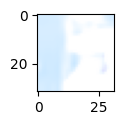

PyObject <matplotlib.image.AxesImage object at 0x7ff9af0429d0>

In [21]:
plt.figure(figsize=(1,1))
plt.imshow(new1[:,:,:,17])

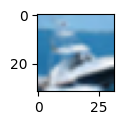

PyObject <matplotlib.image.AxesImage object at 0x7ff8f8283d90>

In [22]:
plt.figure(figsize=(1,1))
plt.imshow(new1[:,:,:,18])

### ResNet 

In [93]:
include("resnetlib.jl")

Main.ResNetLib

In [39]:
using Pkg; for p in ["IterTools", "Knet","ArgParse", "CUDA"]; Pkg.add(p); end
using Printf, Dates, Random, CUDA, Knet, ArgParse, Test, Base.Iterators, IterTools

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [65]:
#w, m = ResNetLib.resnetcifarinit(50; nclasses=10)

(KnetArray{Float32,N} where N[K32(3,3,3,16)[-0.17866468⋯], K32(32)[1.0⋯], K32(3,3,16,16)[0.16890442⋯], K32(32)[1.0⋯], K32(3,3,16,16)[0.05792898⋯], K32(32)[1.0⋯], K32(3,3,16,16)[-0.08146291⋯], K32(32)[1.0⋯], K32(3,3,16,16)[8.544644e-5⋯], K32(32)[1.0⋯]  …  K32(3,3,64,64)[0.051730298⋯], K32(128)[1.0⋯], K32(3,3,64,64)[-0.07257652⋯], K32(128)[1.0⋯], K32(3,3,64,64)[0.07376603⋯], K32(128)[1.0⋯], K32(3,3,64,64)[-0.0013677719⋯], K32(128)[1.0⋯], K32(10,64)[-0.20344615⋯], K32(10,1)[0.0⋯]], Any[Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), Knet.Ops20.BNMoments(0.1, nothing, nothing, zero

In [144]:
w, m, _ = ResNetLib.resnet50init(;trained=false,dataset=:cifar10)

(KnetArray{Float32,N} where N[K32(3,3,3,256)[0.029359616⋯], K32(512)[1.0⋯], K32(1,1,256,256)[0.07923682⋯], K32(512)[1.0⋯], K32(1,1,256,64)[-0.1722002⋯], K32(128)[1.0⋯], K32(3,3,64,64)[-0.008001351⋯], K32(128)[1.0⋯], K32(1,1,64,256)[-0.015322393⋯], K32(512)[1.0⋯]  …  K32(1,1,512,2048)[0.01174744⋯], K32(4096)[1.0⋯], K32(1,1,2048,512)[-0.036786355⋯], K32(1024)[1.0⋯], K32(3,3,512,512)[0.011518433⋯], K32(1024)[1.0⋯], K32(1,1,512,2048)[0.0031387133⋯], K32(4096)[1.0⋯], K32(10,2048)[-0.030797726⋯], K32(10,1)[0.0⋯]], Any[Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), Knet.Ops20.BNMoments(0.1, nothing, nothing, zeros, ones), Knet.Ops20.BNMomen

In [145]:
img = new1[:,:,:,1:32]

32×32×3×32 Array{Float64,4}:
[:, :, 1, 1] =
 0.486275  0.478782  0.473245  0.471192  …  0.553235  0.538265  0.526799
 0.516376  0.505108  0.49827   0.497063     0.497087  0.533555  0.54781
 0.53871   0.527752  0.513622  0.50233      0.462302  0.528034  0.56103
 0.53466   0.52879   0.505462  0.47833      0.479517  0.525051  0.554402
 0.532598  0.517019  0.507587  0.510899     0.473769  0.522125  0.555359
 0.514827  0.496216  0.506508  0.540578  …  0.423191  0.487338  0.527642
 0.477037  0.478718  0.493545  0.513049     0.33194   0.41221   0.459446
 0.463702  0.47369   0.48498   0.491005     0.277167  0.36139   0.410926
 0.482353  0.487203  0.492014  0.493942     0.295632  0.364097  0.407399
 0.511056  0.518686  0.529443  0.535587     0.350741  0.388942  0.418794
 0.517616  0.53023   0.539698  0.536225  …  0.426468  0.41637   0.423476
 0.49527   0.510275  0.506571  0.479732     0.473439  0.424514  0.412519
 0.540564  0.524335  0.463619  0.39357      0.486627  0.446083  0.435639
 ⋮       

In [146]:
_atype = CUDA.functional() ? KnetArray{Float32} : Array{Float32}

KnetArray{Float32,N} where N

In [147]:
img = convert(_atype, img)

32×32×3×32 KnetArray{Float32,4}:
[:, :, 1, 1] =
 0.486275  0.478782  0.473245  0.471192  …  0.553235  0.538265  0.526799
 0.516376  0.505108  0.49827   0.497063     0.497087  0.533555  0.54781
 0.53871   0.527752  0.513622  0.50233      0.462302  0.528034  0.56103
 0.53466   0.52879   0.505462  0.47833      0.479517  0.525051  0.554402
 0.532598  0.517019  0.507587  0.510899     0.473769  0.522125  0.555359
 0.514827  0.496216  0.506508  0.540578  …  0.423191  0.487338  0.527642
 0.477037  0.478718  0.493545  0.513049     0.33194   0.41221   0.459446
 0.463702  0.47369   0.48498   0.491005     0.277167  0.36139   0.410926
 0.482353  0.487203  0.492014  0.493942     0.295632  0.364097  0.407399
 0.511056  0.518686  0.529443  0.535587     0.350741  0.388942  0.418794
 0.517616  0.53023   0.539698  0.536225  …  0.426468  0.41637   0.423476
 0.49527   0.510275  0.506571  0.479732     0.473439  0.424514  0.412519
 0.540564  0.524335  0.463619  0.39357      0.486627  0.446083  0.435639
 ⋮   

In [149]:
h = ResNetLib.resnet50(w ,m, img, dataset=:cifar10, stage=5)

1×1×2048×32 KnetArray{Float32,4}:
[:, :, 1, 1] =
 5.7376394

[:, :, 2, 1] =
 3.1216986

[:, :, 3, 1] =
 3.0923169

...

[:, :, 2046, 1] =
 1.43236

[:, :, 2047, 1] =
 3.4901326

[:, :, 2048, 1] =
 3.5952816

[:, :, 1, 2] =
 11.28745

[:, :, 2, 2] =
 5.98681

[:, :, 3, 2] =
 6.5865364

...

[:, :, 2046, 2] =
 2.8557944

[:, :, 2047, 2] =
 9.070517

[:, :, 2048, 2] =
 7.113509

[:, :, 1, 3] =
 7.200091

[:, :, 2, 3] =
 3.8048763

[:, :, 3, 3] =
 4.4612355

...

[:, :, 2046, 3] =
 2.0310864

[:, :, 2047, 3] =
 5.5378556

[:, :, 2048, 3] =
 4.7862144

...

[:, :, 1, 30] =
 6.8085375

[:, :, 2, 30] =
 4.1058106

[:, :, 3, 30] =
 4.4884596

...

[:, :, 2046, 30] =
 1.4292872

[:, :, 2047, 30] =
 5.404267

[:, :, 2048, 30] =
 4.440671

[:, :, 1, 31] =
 11.3108425

[:, :, 2, 31] =
 6.010627

[:, :, 3, 31] =
 6.6144543

...

[:, :, 2046, 31] =
 2.8678782

[:, :, 2047, 31] =
 9.055251

[:, :, 2048, 31] =
 7.143904

[:, :, 1, 32] =
 7.750505

[:, :, 2, 32] =
 4.176904

[:, :, 3, 32] =
 5.020014



In [163]:
h_1 = mat(h[:,:,:,1])

1×2048 KnetArray{Float32,2}:
 5.73764  3.1217  3.09232  7.7879  …  6.08126  1.43236  3.49013  3.59528

In [179]:
h_2 = mat(h[:,:,:,2])

1×2048 KnetArray{Float32,2}:
 11.2874  5.98681  6.58654  15.3508  …  11.4138  2.85579  9.07052  7.11351

In [186]:
size(mat(h_1))

(1, 2048)

In [188]:
mat_h = mat(h)

2048×32 KnetArray{Float32,2}:
  5.73764   11.2874     7.20009   …   6.80854    11.3108     7.7505
  3.1217     5.98681    3.80488       4.10581     6.01063    4.1769
  3.09232    6.58654    4.46124       4.48846     6.61445    5.02001
  7.7879    15.3508    10.6036        9.96811    15.3949    10.1341
  2.43096    4.24389    2.8083        2.57371     4.26712    3.26608
  2.24695    4.64666    3.29986   …   3.24168     4.65583    3.45314
  1.21969    2.33566    1.61404       1.78951     2.35482    1.90485
  4.04906    8.10567    5.39003       5.07615     8.13039    5.49289
  2.61751    5.83422    3.62429       3.13588     5.84773    3.81627
  2.55506    5.3489     3.53155       3.30245     5.3378     3.78135
  2.44093    6.22387    4.19558   …   4.14142     6.20104    4.88931
 10.8809    22.7302    15.1447       14.5726     22.7502    16.0856
  4.30079    9.28914    6.20882       6.18028     9.26344    6.68874
  ⋮                               ⋱               ⋮         
  2.13881    3.9

###  Projection

In [189]:
# dense layer:
struct Dense; w; b; f; end
(d::Dense)(x) = d.f.(d.w * mat(x) .+ d.b)
Dense(i::Int,o::Int,f=Knet.relu) = Dense(param(o,i), param0(o), f)

Dense

In [176]:
projection = Dense(2048,128)

Dense(P(KnetArray{Float32,2}(128,2048)), P(KnetArray{Float32,1}(128)), Knet.Ops20.relu)

In [192]:
z = projection(mat_h)

128×32 KnetArray{Float32,2}:
  0.0        0.0        0.0       0.0       …   0.0       0.0        0.0
  0.968208   4.34483    1.85906   2.18856       1.61333   4.34514    3.24974
  0.0        0.0        0.0       0.0           0.0       0.0        0.0
  0.0        0.0        0.0       0.0           0.0       0.0        0.0
 10.607     22.9155    15.5366   10.3308       14.2167   22.9949    16.2636
  0.0        0.0        0.0       0.0       …   0.0       0.0        0.0
  0.0        0.0        0.0       0.0           0.0       0.0        0.0
  7.6564    14.6435    10.3283    7.72381       9.61549  14.6816    10.8189
  7.74042   17.0059    10.9711    7.69835      10.4689   17.0303    11.2738
  0.810201   0.696032   0.0       1.27904       0.0       0.672003   0.556967
  0.0        0.0        0.0       0.0       …   0.0       0.0        0.0
  0.0        0.0        0.0       0.0           0.0       0.0        0.0
  6.06222   12.7158     8.53055   7.07589       9.5487   12.7246     9.7746
 

### Contrastive Loss

### Minimize loss

In [69]:
y = ResNetLib.resnetcifar(w, m, img)

8×8×64×2 KnetArray{Float32,4}:
[:, :, 1, 1] =
 1885.49    1653.51   2009.73   2166.37   2181.56   2355.37  2328.89  2244.36
  821.132   1645.42   1634.61   1714.45   1670.97   1890.16  2132.51  2238.56
  876.596    894.287   809.253   886.549  1246.13   1487.28  2148.69  2915.76
 1198.17     615.434   689.168   502.616   864.49   1071.13  1735.97  2751.02
  613.747    559.453   601.728   260.997   471.728   816.92  1506.8   2650.9
  456.628    136.609   129.232     0.0     219.312  1563.44  1517.07  2075.16
  710.487      0.0     249.579   620.034  1050.67   3450.84  2814.07  2269.59
   23.6124     0.0    1246.9    2051.81   3695.72   6915.49  6928.62  3530.52

[:, :, 2, 1] =
  5805.34  10148.8   12709.3   11178.2   …   8664.26   7947.46  6154.41
  8599.06  14624.1   14331.5   13877.5      13517.3   11507.0   9780.07
  8803.7   14313.8   13302.4   12125.1      11718.6   10537.8   8732.77
  9316.16  15974.6   13777.4   12861.7      12618.8   10510.4   8117.54
 10221.5   16696.2   13532.

In [56]:
ypred = map( y -> y[1], argmax(y, dims=1))

1×2 Array{Int64,2}:
 1  1

In [57]:
train_y[17:17]

1-element Array{Int64,1}:
 9

In [31]:
Resnetlib.main(new1[:,:,:,18])

LoadError: UndefVarError: Resnetlib not defined

In [34]:
w, m, meta = resnet101init()

LoadError: UndefVarError: resnet101init not defined

LoadError: UndefVarError: image not defined

In [ ]:
    n = length(state)
    n == 0 && return nothing
    batchsize = min(d.batchsize, n)
    indices, new_state = state[1:batchsize], state[batchsize+1:end]
    words, tags = d.words[indices], d.tags[indices]
    batchsizes = Int[]

In [ ]:
function minibatch(x, y, bs=256)
    data = Any[]
    # Your code here
    nx = size(x)[end]
    for i in 1:bs:nx        
        mini_x = x[:,:,i:i+bs-1]
        mini_y = y[i:i+bs-1]   
        push!(data, (mini_x, mini_y))
    end
    return data
end


In [34]:
num_images

3670

In [38]:
tfds_dataset

PyObject <PrefetchDataset shapes: {image: (None, None, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>

In [51]:
data_util[:preprocess_image]

PyObject <function preprocess_image at 0x7f1d2c58e560>

In [52]:
x["image"] = data_util[:preprocess_image](x["image"], 224,224, is_training=false, color_distort=false)

LoadError: UndefVarError: x not defined

In [47]:
py"""
import data_util
def _preprocess(x):
  x['image'] = data_util.preprocess_image(
      x['image'], 224, 224, is_training=False, color_distort=False)
  return x
"""
x = tfds_dataset.map(py"_preprocess").batch(batch_size)
x = tf.data.make_one_shot_iterator(x).get_next()

LoadError: PyError ($(Expr(:escape, :(ccall(#= /home/admin2/.julia/packages/PyCall/tqyST/src/pyeval.jl:38 =# @pysym(:PyEval_EvalCode), PyPtr, (PyPtr, PyPtr, PyPtr), o, globals, locals))))) <class 'ModuleNotFoundError'>
ModuleNotFoundError("No module named 'data_util'")
  File "/home/admin2/.julia/packages/PyCall/tqyST/src/pyeval.jl", line 1, in <module>
    const Py_single_input = 256  # from Python.h


In [43]:
x

LoadError: UndefVarError: x not defined

In [ ]:
reprocess_image(
      x['image'], 224, 224, is_training=False, color_distort=False)

In [ ]:
def _preprocess(x):
  x['image'] = preprocess_image(
      x['image'], 224, 224, is_training=False, color_distort=False)
  return x